In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import Input, Dense
from keras.models import Sequential     

In [ ]:
df = pd.read_csv("diabetes.csv")

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.isna().sum()

In [ ]:
df["BMI"]=df["BMI"].astype("int64")
# df["DiabetesPedigreeFunction"]=df["DiabetesPedigreeFunction"].astype("int64")

In [ ]:
X=df.drop("Outcome",axis=1)
y=df["Outcome"]

In [ ]:
X=X.drop("DiabetesPedigreeFunction", axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=16)

In [ ]:
shape=X_train.shape[1]

In [ ]:
model = Sequential([
    Input(shape=shape),
    Dense(560, activation="relu"),
    Dense(260, activation="relu"),
    Dense(120, activation="relu"),
    Dense(1, activation="sigmoid")
])

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
from keras.callbacks import ModelCheckpoint

In [ ]:
check=ModelCheckpoint("diabet.h5", monitor="val_loss", save_best_only=True)

In [ ]:
r=model.fit(X_train, y_train, epochs=50, validation_split=0.3, callbacks=check)

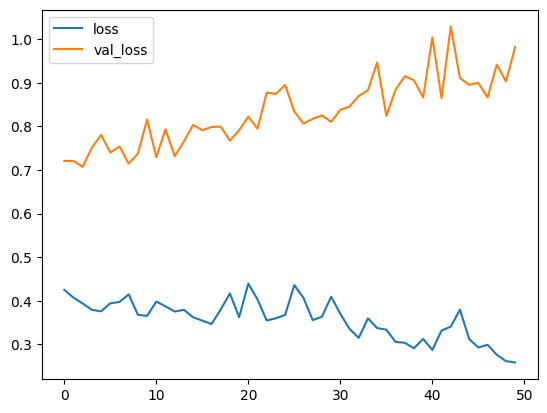

In [39]:
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

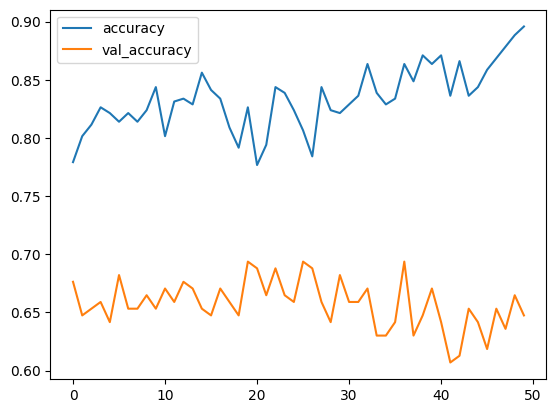

In [41]:
plt.plot(r.history["accuracy"], label="accuracy")
plt.plot(r.history["val_accuracy"], label="val_accuracy")
plt.legend()
plt.show()

In [43]:
model.evaluate(X_test,y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.8712 - accuracy: 0.6927


[0.871224582195282, 0.6927083134651184]